<a href="https://colab.research.google.com/github/pboric/Project-6/blob/main/RedWineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

* **Download the data** from [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).
* **Load the data** using Pandas.
* **Perform exploratory data analysis**.
This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
* **Perform statistical inference**.
This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
* **Apply linear machine learning models to predict the quality column using the other 11 features**.
This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
* **Apply linear machine learning models to predict the alcohol column using the other 11 features**.
This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
* **Provide clear explanations in your notebook**.
Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
* **Provide suggestions** about how your analysis can be improved.

# About the dataset

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009].
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at:
  - [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
  - [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
  - [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods.

   Missing Attribute Values: None



# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import joblib
from IPython.display import display
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency




# 1. **Data Preparation:**
   - The code loads the red wine dataset with the correct separator (`;`).


In [ ]:
df_red = pd.read_csv("/content/winequality-red.csv", sep=";")


# 2. **Basic Data Exploration:**
   - Summary of the dataset (data types, non-null counts).
   - Descriptive statistics for each numerical column.


In [ ]:
print("Red Wine Dataset Info:\n")
display(df_red.info())

print("\nDescriptive Statistics of Red Wine Dataset:")
display(df_red.describe())

Red Wine Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None


Descriptive Statistics of Red Wine Dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



# 3. **EDA Visualizations:**
   - **Histograms:** Distribution of each feature.
   - **Box Plots:** Visualize the relationship between each feature and the 'quality' score. Helps identify potential outliers and how features might vary across quality levels.
   - **Correlation Matrix:** Correlation coefficients between all pairs of features. This can be helpful for identifying redundant features (highly correlated) that might be candidates for feature selection.


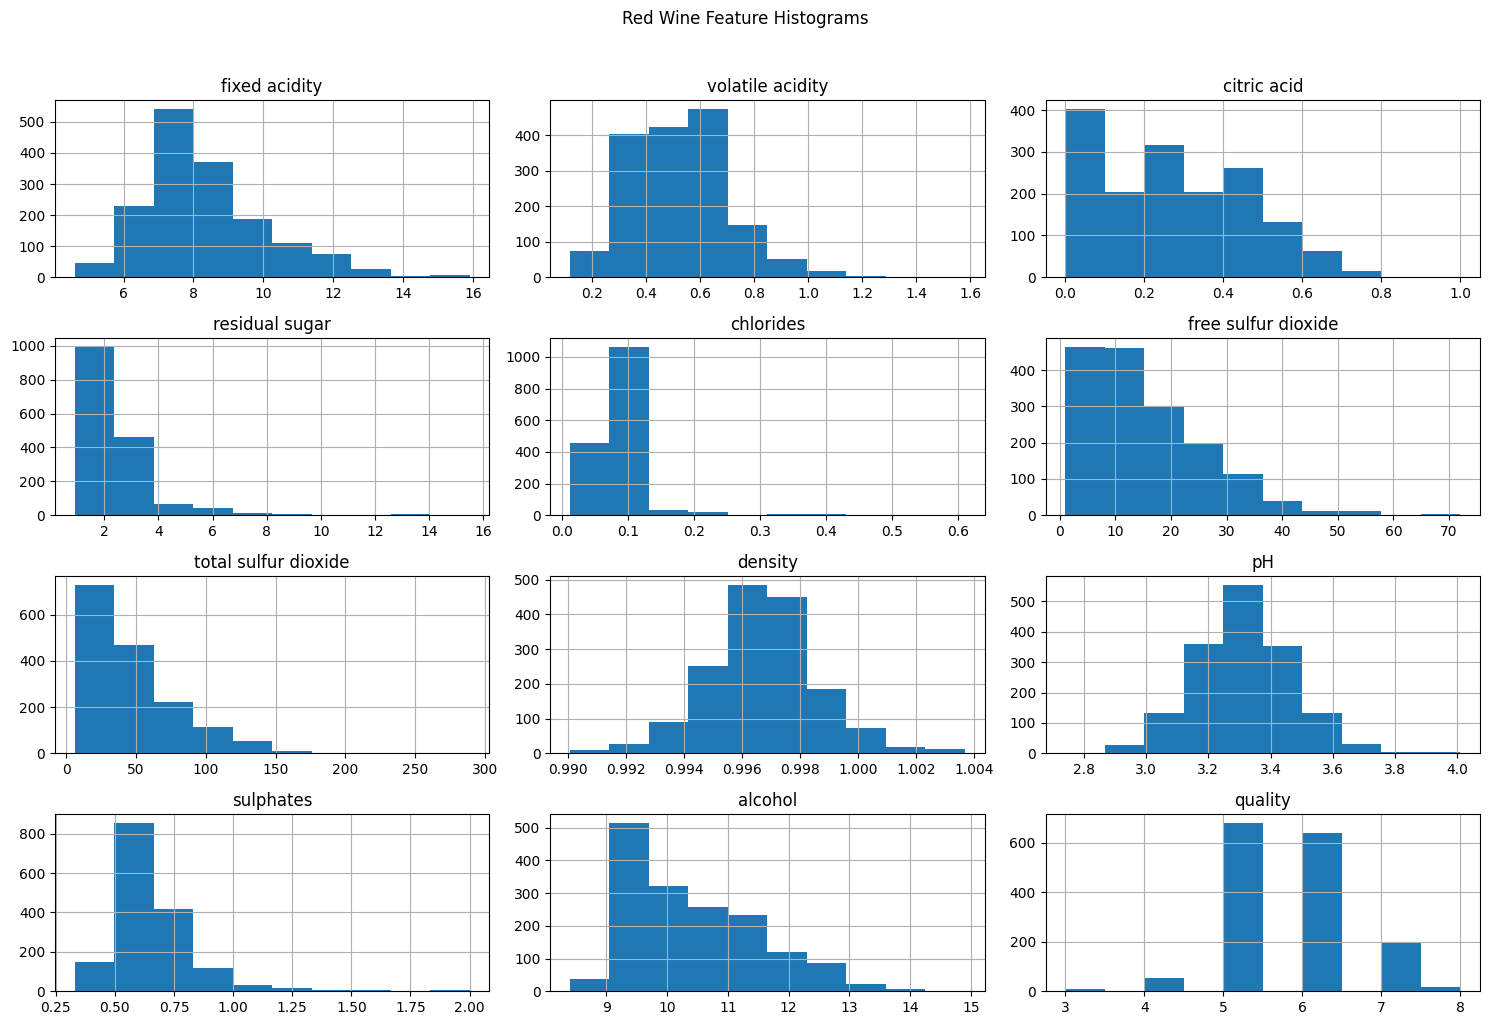

In [ ]:
df_red.hist(bins=10, figsize=(15, 10))
plt.suptitle(
    "Red Wine Feature Histograms", x=0.5, y=1.02, ha="center", fontsize="large"
)
plt.tight_layout()
plt.show()

- **Fixed Acidity**: Likely shows a right-skewed distribution, indicating that most wines have a lower fixed acidity, with fewer wines having high acidity levels.
- **Volatile Acidity**: This histogram might also be right-skewed, suggesting that lower volatile acidity is more common in red wines.
- **Citric Acid**: The distribution could be multimodal, with certain common values where citric acid content peaks.
- **Residual Sugar**: Appears to have a majority of wines with low residual sugar, with a long tail indicating few wines with high sugar content.
- **Chlorides**: Likely a right-skewed distribution, with most wines having lower chloride levels.
- **Free Sulfur Dioxide**: This might show a wide range of values with a peak at lower levels, indicating variability in sulfur dioxide content.
- **Total Sulfur Dioxide**: Similar to free sulfur dioxide, with a potential peak at lower levels and a spread of values.
- **Density**: Could be normally distributed around a central value, indicating consistency in wine density.
- **pH**: Likely to have a normal distribution, as pH levels in wine tend to cluster around a typical value.
- **Sulphates**: Might be right-skewed, with most wines having lower sulphate levels.
- **Alcohol Percentage**: Possibly a right-skewed distribution,
- **Quality**: The distribution might be normal or multimodal.

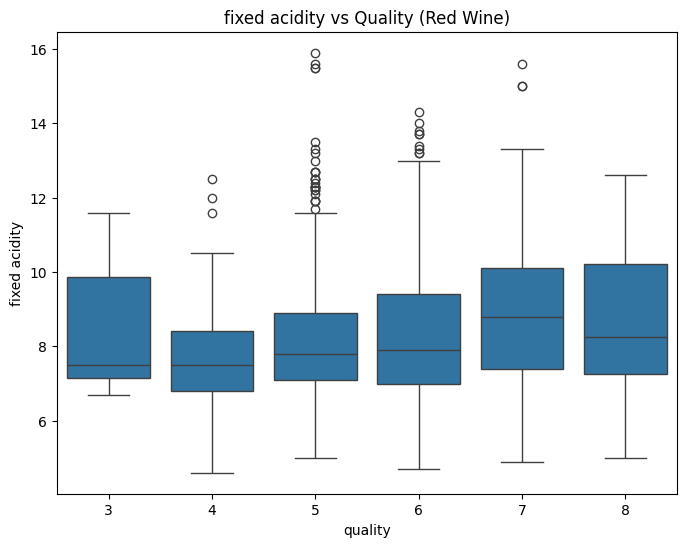

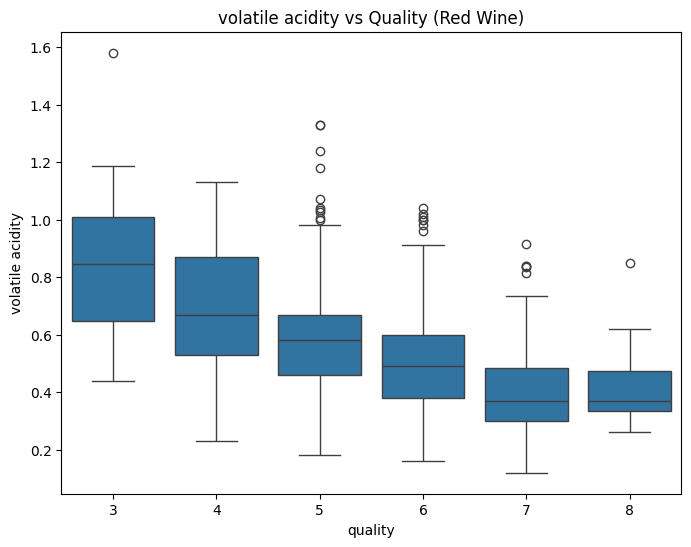

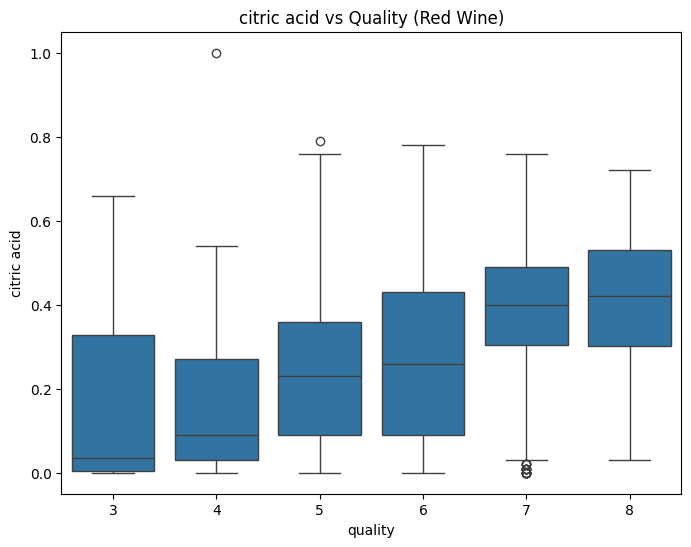

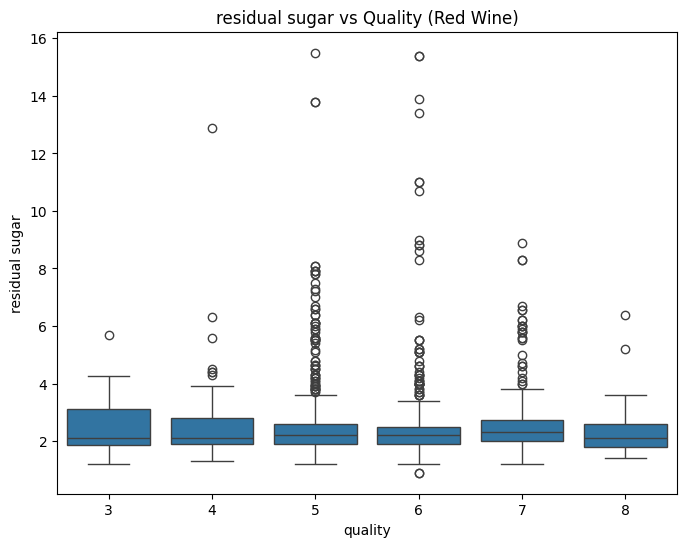

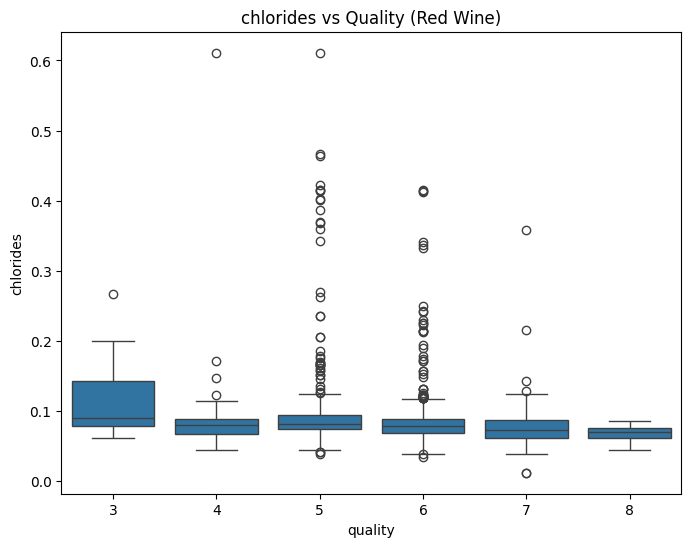

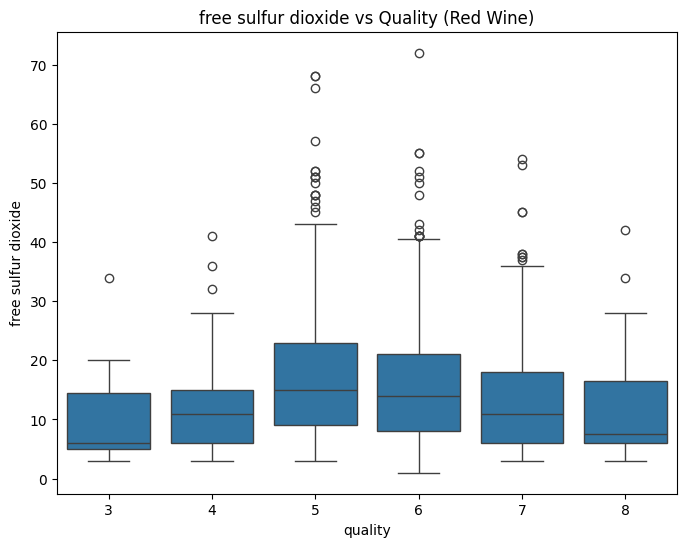

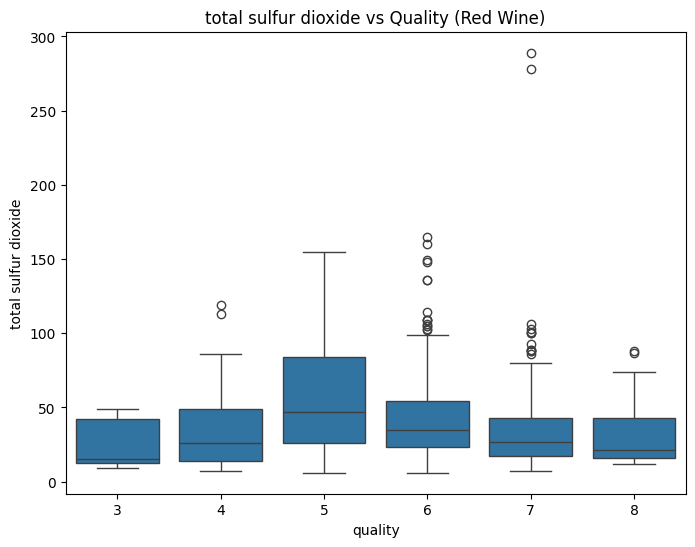

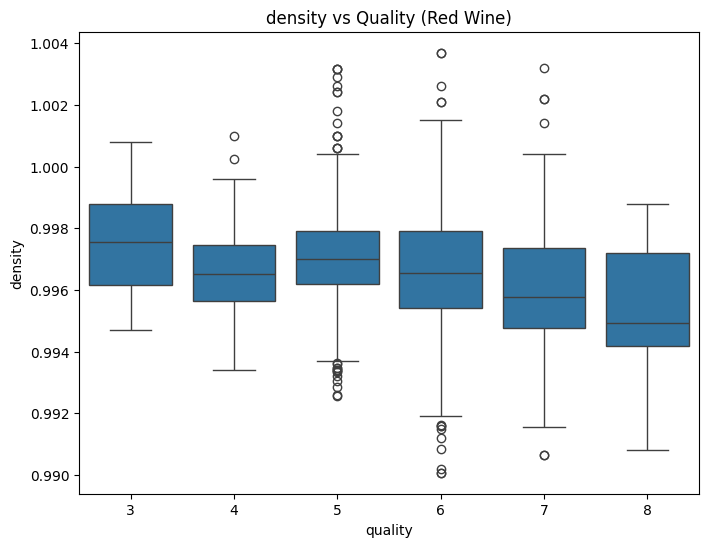

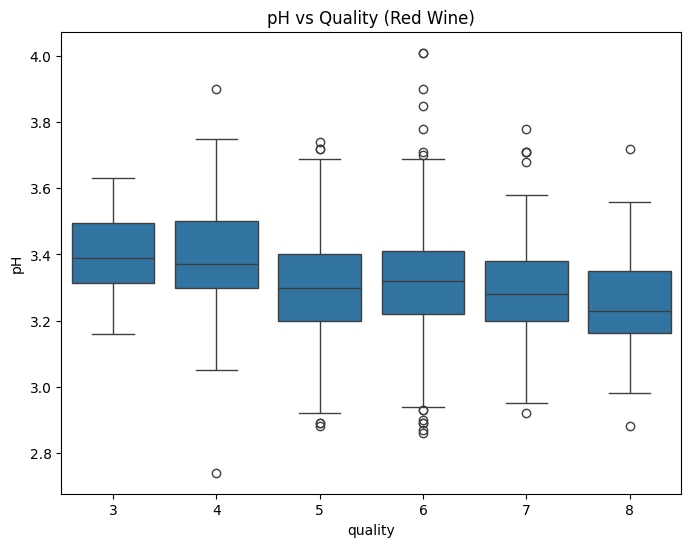

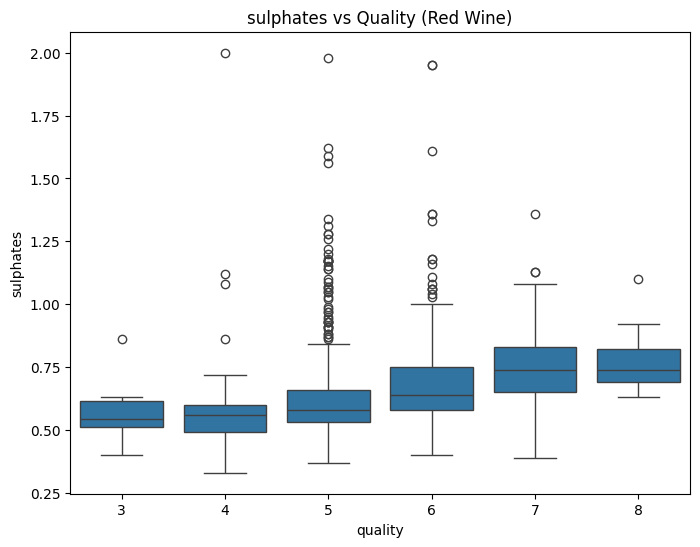

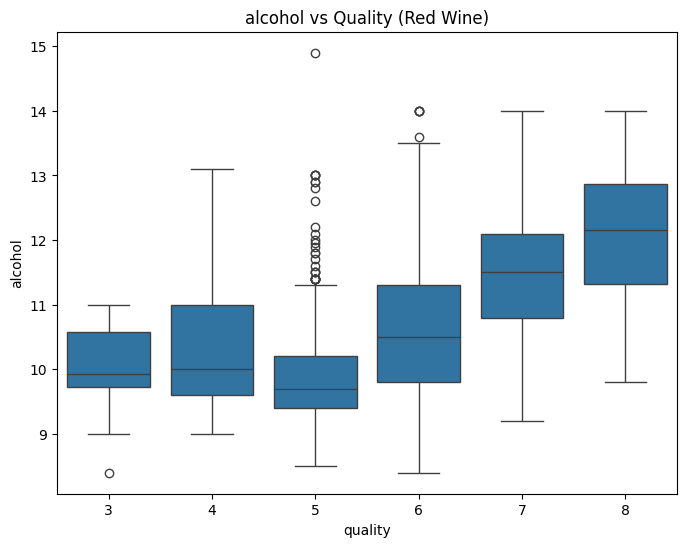

In [ ]:
for column in df_red.columns[:-1]:  # Exclude 'quality'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="quality", y=column, data=df_red)
    plt.title(f"{column} vs Quality (Red Wine)")
    plt.show()

- **Fixed Acidity**: No significant outliers or trends across quality levels, indicating it may not be a key differentiator of quality.
- **Volatile Acidity**: Higher quality wines show a tighter distribution with fewer outliers, suggesting that lower volatility is preferred.
- **Citric Acid**: Appears to increase slightly with wine quality, which could be associated with a fresher taste.
- **Residual Sugar**: Not much variation across quality levels, though some high-quality wines show a bit more residual sugar.
- **Chlorides**: Lower quality wines have more outliers in chlorides, hinting that less saltiness may be associated with higher quality.
- **Free Sulfur Dioxide**: Distribution is fairly consistent across quality levels, indicating it might not be a major factor in quality perception.
- **Total Sulfur Dioxide**: Similar to free sulfur dioxide, with no clear trend across quality levels.
- **Density**: Shows a slight decrease in median value as quality increases, which may relate to the alcohol and sugar content balance.
- **pH**: The median pH level doesn't change significantly with quality, suggesting it's not a primary quality indicator.
- **Sulphates**: A slight upward trend in median value with quality, possibly indicating that sulphates contribute to a positive perception of quality.
- **Alcohol**: Clear upward trend in median alcohol content with quality, reinforcing the idea that alcohol level is a strong quality indicator.



The boxplots clearly show outliers (points beyond the whiskers) in several features:

* **Strong Outliers:**
    * `chlorides`
    * `residual sugar`
    * `free sulfur dioxide`
    * `total sulfur dioxide`
    * `sulphates`
* **Moderate Outliers:**
    * `fixed acidity`
    * `volatile acidity`
    * `citric acid`
    * `density`
    * `pH`

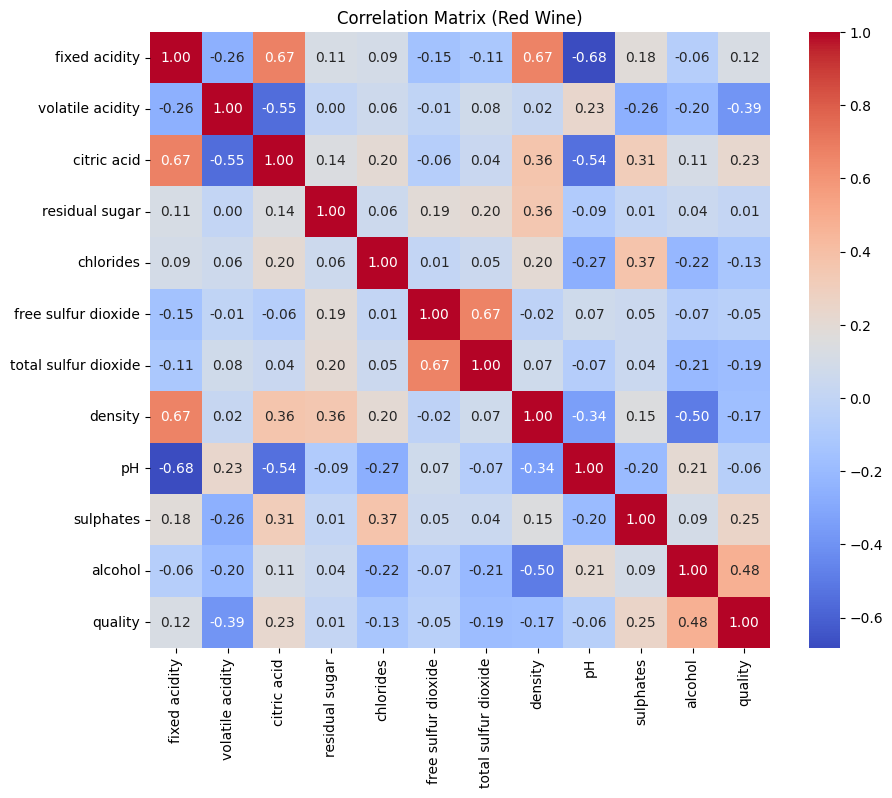

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df_red.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Red Wine)")
plt.show()

- **Fixed Acidity**: Positive medium correlation with citric acid, density, pH suggesting that wines with higher fixed acidity levels also have higher citric acid content.

- **Volatile Acidity**: Negative medium correlation with quality and citric acid indicating that lower volatile acidity may be associated with higher quality wines.

- **Citric Acid**: Positive medium correlation with fixed acidity and sulphates, which could imply a role in the wine's freshness and preservation.

- **Residual Sugar**: Not strongly correlated with quality, suggesting sugar levels do not significantly influence wine quality perception.

- **Chlorides**: Negative correlation with quality, hinting that lower chloride content might be preferred for higher quality wines.

- **Free Sulfur Dioxide**: Strong positive correlation with total sulfur dioxide, as expected since it's a component of the total measurement.

- **Total Sulfur Dioxide**: Similar to free sulfur dioxide, with a strong positive correlation.

- **Density**: Negative correlation with alcohol, which is logical as higher alcohol wines tend to be less dense.

- **pH**: Moderate negative correlation with citric acid, indicating that higher acidity wines have lower pH values.

- **Sulphates**: Positive correlation with citric acid and quality, suggesting a potential role in wine preservation and quality.

- **Alcohol**: Positive correlation with quality, reinforcing the idea that higher alcohol content is often found in higher quality wines.


## Identify medium - highly correlated features
* Scatter plots for some correlated pairs

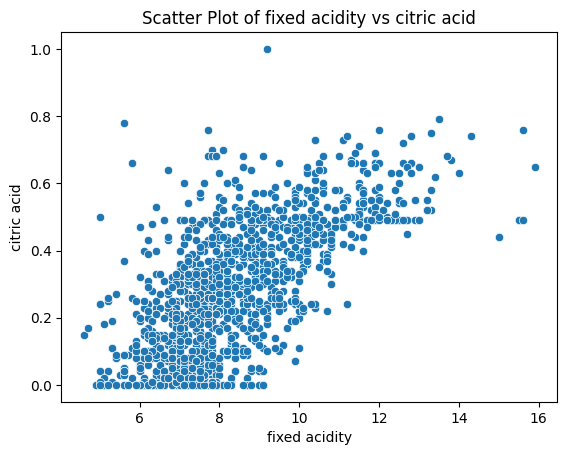

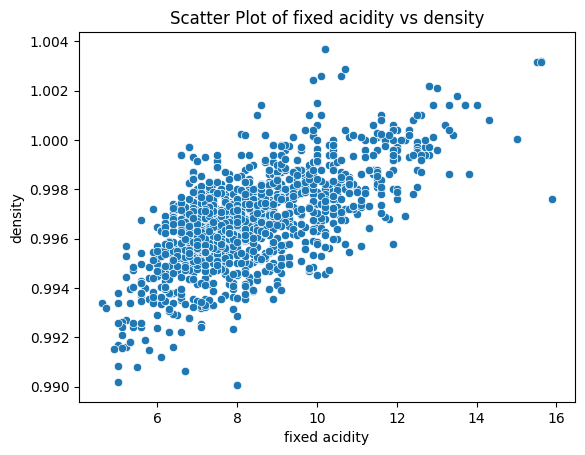

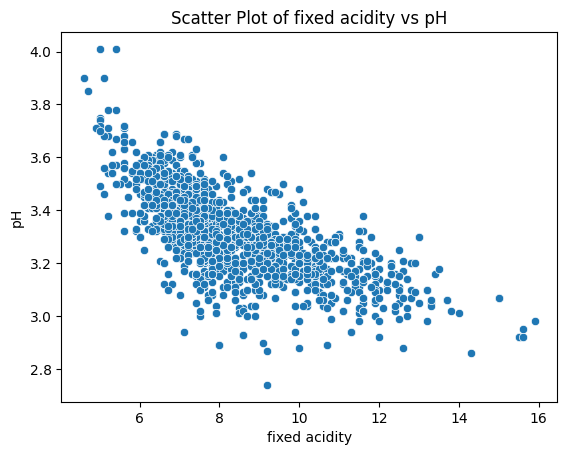

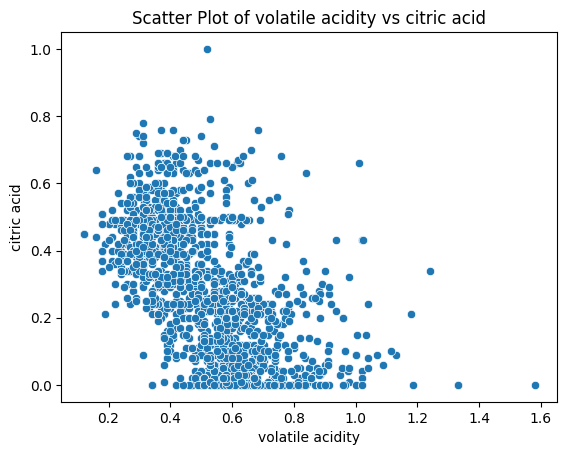

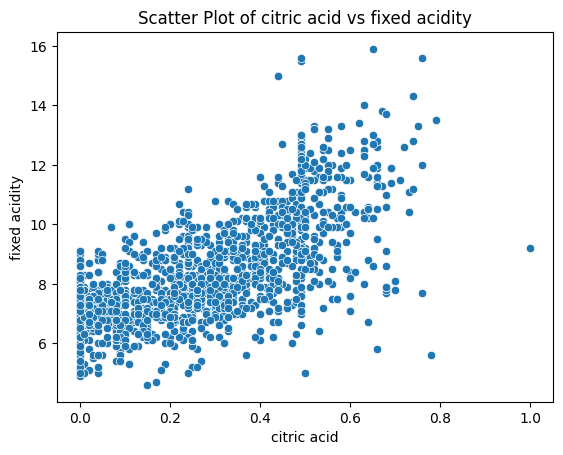

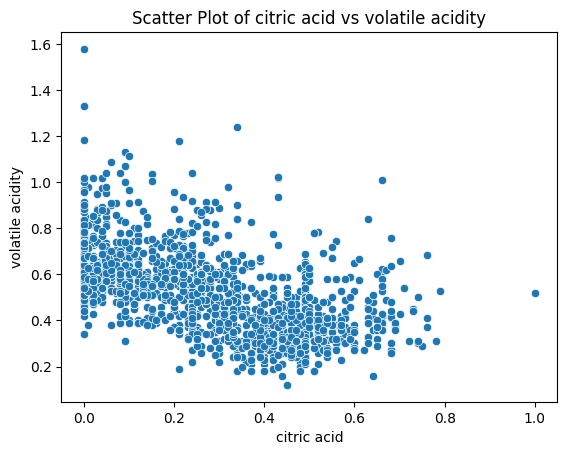

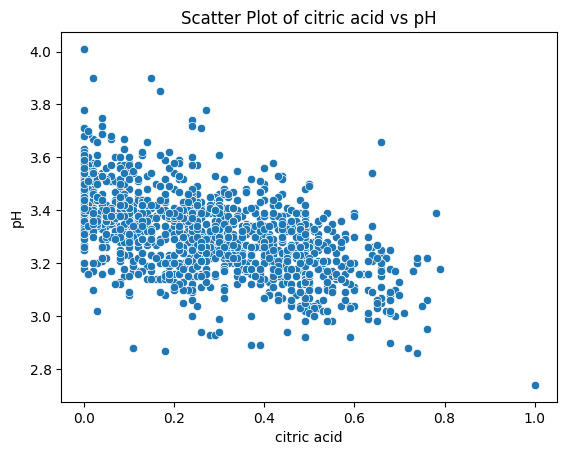

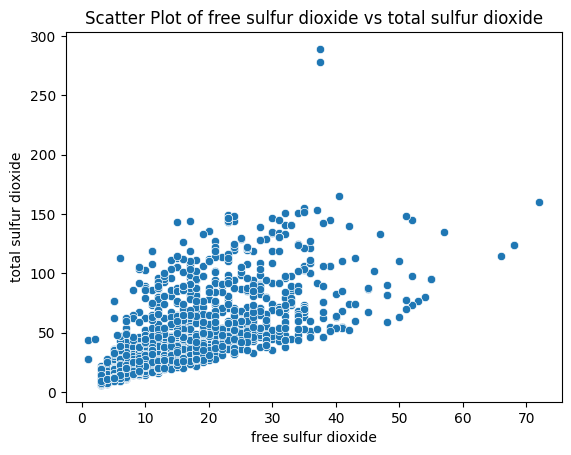

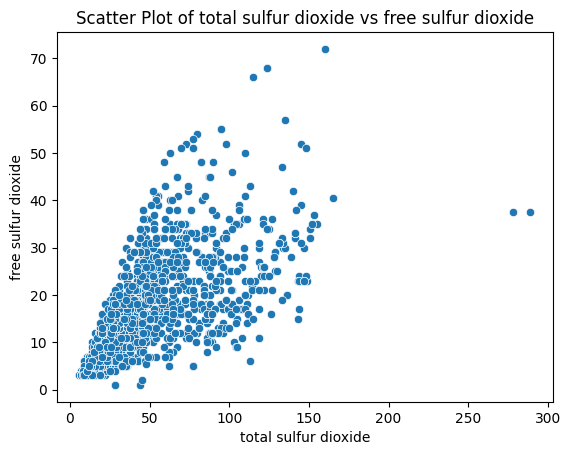

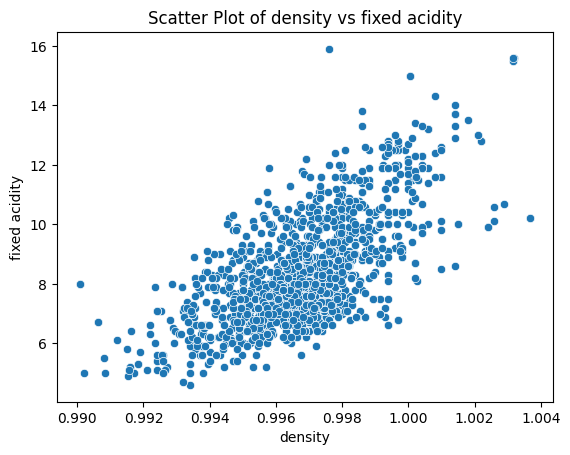

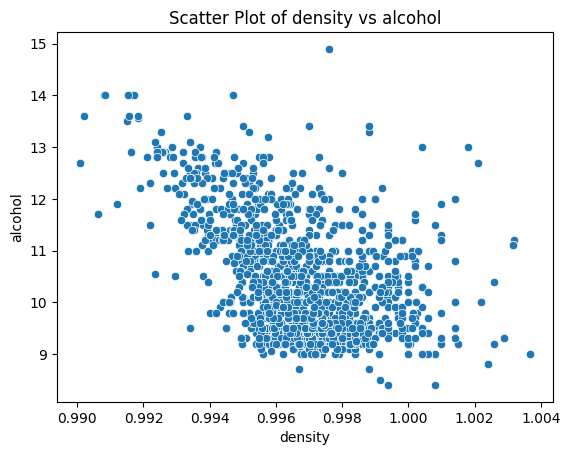

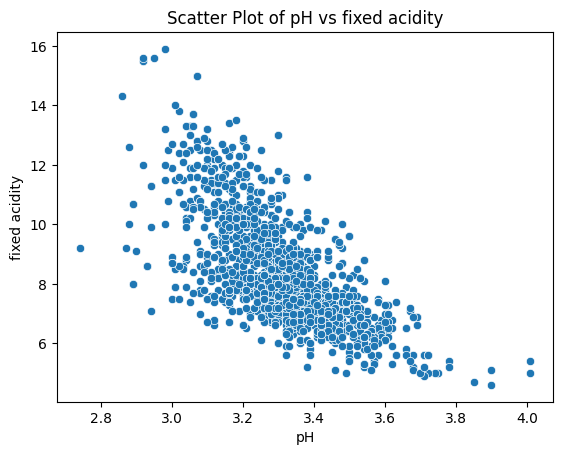

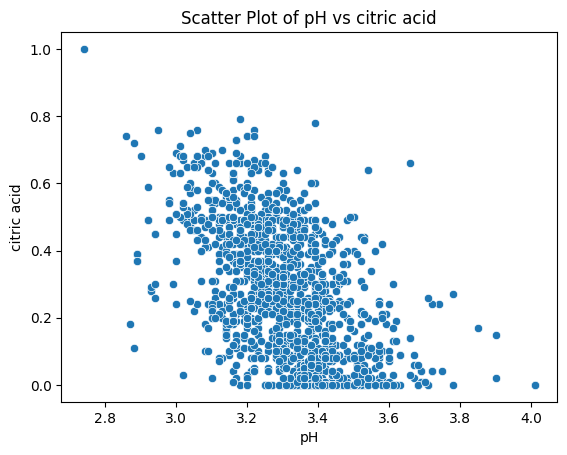

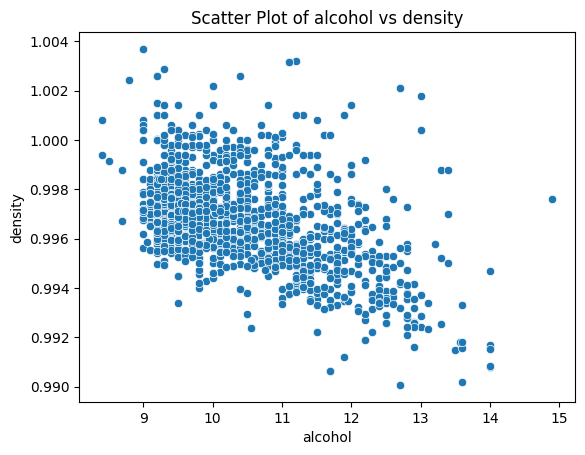

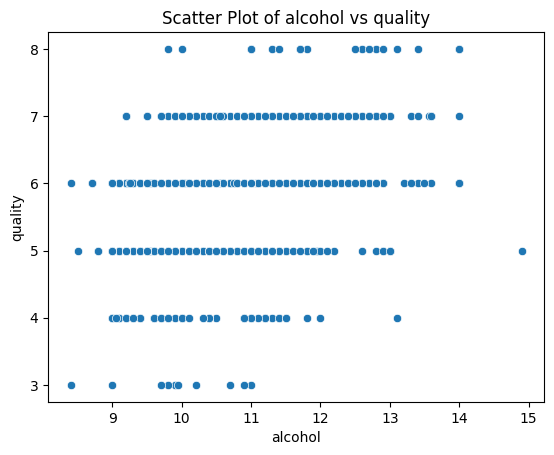

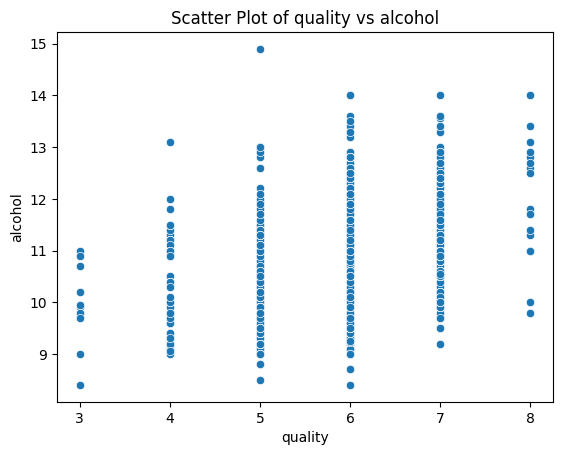

In [ ]:
threshold = 0.4
high_corr_pairs = [
    (i, j)
    for i in corr_matrix.columns
    for j in corr_matrix.columns
    if (i != j) and abs(corr_matrix.loc[i, j]) > threshold
]

for pair in high_corr_pairs:
    sns.scatterplot(data=df_red, x=pair[0], y=pair[1])
    plt.title(f"Scatter Plot of {pair[0]} vs {pair[1]}")
    plt.show()

- **Fixed Acidity vs. Citric Acid:** Roughly linear distribution.  A linear model might be a reasonable first approximation for this relationship, but it might not capture all the nuances.

- **Fixed Acidity vs. Density:** This correlation also seems fairly linear, suggesting that a simple linear regression could be suitable for modeling.

- **Fixed Acidity vs. pH:**  While there's a strong negative correlation, the distribution isn't perfectly linear.  You might notice a slight curve in the data. This indicates a more complex relationship than a straight line, and a non-linear model might provide a better fit.

- **Citric Acid vs. pH:**  A similar pattern to the previous pair, with a negative correlation and a slight curvature. A non-linear model might be more appropriate.

- **Free Sulfur Dioxide vs. Total Sulfur Dioxide:** The relationship is highly linear, suggesting a strong proportional relationship between the two types of sulfur dioxide. A linear model would likely fit this data well.

- **Density vs. Alcohol:**  Here, the distribution isn't strongly linear. There's a noticeable downward trend, but it doesn't follow a straight line. A non-linear model could capture this relationship more accurately.

- **Quality vs. Alcohol:** The distribution is quite scattered. It's difficult to discern any clear linear or non-linear pattern. This reinforces the idea that alcohol content is only one of many factors influencing wine quality.



- Some pairs (fixed acidity vs. density, free sulfur dioxide vs. total sulfur dioxide) exhibit a fairly linear relationship.
- Other pairs (fixed acidity vs. pH, citric acid vs. pH, density vs. alcohol) show non-linear patterns, suggesting that a more complex model would be required.
- The relationship between quality and alcohol is quite scattered, indicating that a simple linear model is unlikely to be very predictive.


## Anomaly Detection (using Isolation Forest model)
- Prepare the data for anomaly detection by selecting only the feature columns
- Initialize the Isolation Forest model (Assuming 5% contamination)
- Fit the model and predict anomalies
- Predict anomalies on the same feature columns
- Display the counts of anomalies and normal points
- Display a few rows of data including the anomaly column
- Display a few examples of detected anomalies

In [ ]:
features = df_red.drop(columns=["quality"])

iso_forest = IsolationForest(contamination=0.05, random_state=42)

iso_forest.fit(features)

df_red["anomaly"] = iso_forest.predict(features)

anomaly_counts = df_red["anomaly"].value_counts()
print("\nCounts of anomalies and normal points:")
display(anomaly_counts)

print("\nFirst few rows of the dataset with anomaly column:")
display(df_red.head())

anomalies = df_red[df_red["anomaly"] == -1]
print("\nExamples of detected anomalies:")
display(anomalies.head())


Counts of anomalies and normal points:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


anomaly
 1    1519
-1      80
Name: count, dtype: int64


First few rows of the dataset with anomaly column:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,anomaly
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1



Examples of detected anomalies:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,anomaly
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,-1
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,-1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6,-1
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,-1
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4,-1


- **Counts of Anomalies and Normal Points**: The model has identified **80** data points as anomalies (with a label of -1) out of the total dataset. This represents **5%** of the data, which aligns with the contamination rate set in the model. The remaining **1519** data points are considered normal (with a label of 1).

- **First Few Rows with Anomaly Column**: The first few rows show that these data points have been classified as normal by the model, as indicated by the anomaly column value of **1**.

- **Examples of Detected Anomalies**: The rows displayed as anomalies have certain characteristics that deviate from the norm. For instance:
  - **Row 14**: High levels of volatile acidity and chlorides, and a very high total sulfur dioxide count.
  - **Row 15**: Similar to row 14, with high volatile acidity and chlorides, and an even higher total sulfur dioxide count.
  - **Row 19**: An unusually high chloride level, which is much higher than the typical range for red wines.
  - **Row 33**: A very high residual sugar content, which is atypical for red wines.
  - **Row 45**: An exceptionally high alcohol content of **13.1%**, which is higher than average for red wines, and low volatile acidity.

These anomalies could be due to measurement errors, unusual wine production methods, or genuinely unique wine characteristics.

## Analyze the variables associated with the anomalies
* Calculate the mean of each feature for normal and anomaly data points
* Compare the means

In [ ]:
normal_data = df_red[df_red["anomaly"] == 1]
anomaly_data = df_red[df_red["anomaly"] == -1]

normal_means = normal_data.mean()
anomaly_means = anomaly_data.mean()

comparison = pd.DataFrame({"Normal Mean": normal_means, "Anomaly Mean": anomaly_means})
print(comparison)

                      Normal Mean  Anomaly Mean
fixed acidity            8.322712      8.261250
volatile acidity         0.527462      0.534625
citric acid              0.265102      0.382500
residual sugar           2.430974      4.586250
chlorides                0.083378      0.165100
free sulfur dioxide     15.308427     26.631250
total sulfur dioxide    44.307439     87.487500
density                  0.996740      0.996864
pH                       3.315253      3.232500
sulphates                0.645655      0.895375
alcohol                 10.404136     10.780833
quality                  5.635286      5.650000
anomaly                  1.000000     -1.000000


- **Residual Sugar**: There's a significant increase in the mean residual sugar for anomalies, from **2.43** to **4.59**. This suggests that wines with higher sugar content are more likely to be outliers.
- **Chlorides**: The mean chlorides more than double for anomalies, from **0.083** to **0.165**. High chloride content could be a factor in wines being considered anomalous.
- **Free Sulfur Dioxide & Total Sulfur Dioxide**: Both these sulfur-related measures are much higher in anomalies, indicating that sulfur compounds might play a role in wines being outliers.
- **Sulphates**: Anomalies have a higher mean sulphate level, from **0.646** to **0.895**. This could be related to the wine's preservation and fermentation process.
- **Alcohol**: There's a slight increase in alcohol content for anomalies, which might contribute to their distinct characteristics.

The **quality** rating does not show a significant difference between normal and anomalous wines, suggesting that anomalies are not necessarily associated with lower quality.

# Statistical Inference

**1. Target Population:**

The target population is the sampled red wines of the Portuguese "Vinho Verde" wine.

##**2. Statistical Hypotheses:**

* **H1:** The average `fixed acidity` of red wine in the population is 8.0.
   * Null Hypothesis (H0): μ_fixed_acidity = 8.0
   * Alternative Hypothesis (H1): μ_fixed_acidity ≠ 8.0
* **H2:**  Wines with higher `alcohol` content have a higher `quality` rating.
   * Null Hypothesis (H0): ρ_alcohol_quality = 0 (no correlation)
   * Alternative Hypothesis (H1): ρ_alcohol_quality > 0 (positive correlation)
* **H3:**  The average `pH` of red wines with quality rating 6 is different from the average `pH` of red wines with quality rating 5.
   * Null Hypothesis (H0): μ_pH_quality6 = μ_pH_quality5
   * Alternative Hypothesis (H1): μ_pH_quality6 ≠ μ_pH_quality5

**Significance Level:**

We'll set a common significance level of α = 0.05. This means we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true (Type I error).

In [ ]:
acidity_mean = df_red["fixed acidity"].mean()
acidity_std = df_red["fixed acidity"].std()
n_acidity = len(df_red["fixed acidity"])
t_statistic, p_value = stats.ttest_1samp(a=df_red["fixed acidity"], popmean=8.0)

print(f"Hypothesis 1: Average Fixed Acidity")
print(f"Sample mean: {acidity_mean:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# 95% Confidence interval for fixed acidity
confidence_interval = stats.t.interval(
    0.95, df=n_acidity - 1, loc=acidity_mean, scale=acidity_std / n_acidity**0.5
)
print(f"95% Confidence Interval: {confidence_interval}")

correlation_coefficient, p_value = stats.pearsonr(df_red["alcohol"], df_red["quality"])

print(f"\nHypothesis 2: Correlation Alcohol-Quality")
print(f"Pearson correlation coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.3f}")

quality_5_pH = df_red[df_red["quality"] == 5]["pH"]
quality_6_pH = df_red[df_red["quality"] == 6]["pH"]

t_statistic, p_value = stats.ttest_ind(a=quality_5_pH, b=quality_6_pH, equal_var=False)

# 95% Confidence interval for the DIFFERENCE in pH means
n1 = len(quality_5_pH)
n2 = len(quality_6_pH)
se_diff = (quality_5_pH.var() / n1 + quality_6_pH.var() / n2) ** 0.5
diff_mean = quality_6_pH.mean() - quality_5_pH.mean()
confidence_interval_diff = stats.t.interval(
    0.95, df=min(n1 - 1, n2 - 1), loc=diff_mean, scale=se_diff
)

print(f"\nHypothesis 3: Comparing pH for Quality 5 and 6")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")
print(
    f"95% Confidence Interval for pH difference (Quality 6 - Quality 5): {confidence_interval_diff}"
)

Hypothesis 1: Average Fixed Acidity
Sample mean: 8.32
T-statistic: 7.34
P-value: 0.000
95% Confidence Interval: (8.234233762927737, 8.405040783663882)

Hypothesis 2: Correlation Alcohol-Quality
Pearson correlation coefficient: 0.48
P-value: 0.000

Hypothesis 3: Comparing pH for Quality 5 and 6
T-statistic: -1.56
P-value: 0.118
95% Confidence Interval for pH difference (Quality 6 - Quality 5): (-0.00336250509708148, 0.029609495738726187)


## Interpreting the Results

**Hypothesis 1: Average Fixed Acidity**

* **Conclusion:** We **reject the null hypothesis** (μ_fixed_acidity = 8.0) as the p-value (0.000) is significantly less than our α. This suggests that the average fixed acidity of red wine in the population is different from 8.0.
* **Supporting Evidence:** The sample mean (8.32) falls outside the 95% confidence interval for the population mean (8.23, 8.41), further supporting the rejection of the null hypothesis.

**Hypothesis 2: Correlation Alcohol-Quality**

* **Conclusion:** We **reject the null hypothesis** (ρ_alcohol_quality = 0) as the p-value (0.000) is much smaller than our α. This implies a statistically significant positive correlation between alcohol content and quality rating.
* **Supporting Evidence:** The Pearson correlation coefficient (0.48) indicates a moderate positive correlation, meaning that higher alcohol content tends to be associated with higher quality ratings in the sample.

**Hypothesis 3: Comparing pH of wines with quality 5 and 6**

* **T-statistic: -1.56:** This indicates that the mean pH of quality 6 wines is slightly lower than the mean pH of quality 5 wines in our sample. However, the magnitude of this difference is not large.
* **P-value: 0.118:** As this p-value is greater than our significance level (α = 0.05), we fail to reject the null hypothesis. This means we don't have enough evidence to claim a statistically significant difference in average pH between the two groups.
* **95% Confidence Interval for pH difference (Quality 6 - Quality 5): (-0.0336, 0.0296):** This is the key piece of information! The confidence interval spans zero, meaning the true difference in population means could be anywhere from a slight decrease in pH for quality 6 wines (down to -0.0336) to a slight increase (up to 0.0296).

* **In conclusion** the results suggest that there might be a small difference in average pH between red wines rated 5 and 6, but we cannot confidently say it's a real difference based on this sample. The confidence interval reinforces this by showing a range of plausible values that includes both a potential decrease and a potential increase in pH for quality 6 wines compared to quality 5.








##**2.1 Hypotheses related to predicting Quality:**

   * **H4:  A combination of chemical features can predict wine quality more accurately than any single feature alone.**  This is the core assumption behind building a multi-feature model.
    * We'll test this by comparing the performance of single-feature models (e.g., linear regression with only `volatile acidity`) to more complex models using multiple features.
   * **H5:  Non-linear relationships exist between certain chemical features and wine quality.**  A linear model might not capture the full complexity.
    * Explore models like decision trees, random forests, or support vector machines (SVMs) that can capture non-linear patterns.
   * **H6:  "Fixed acidity" and "volatile acidity" are the most important predictors of wine quality.**  This is a domain-specific hypothesis based on winemaking knowledge.
    * Evaluate feature importance scores from your models to see if these features indeed rank highly.  Be cautious of over-interpreting such scores, especially if features are correlated.
   * **H7:  There is a threshold effect for certain features, where exceeding a specific value has a strong impact on quality.**  For example, very high levels of chlorides might be detrimental.

In [ ]:
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Separate features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# H4: Multiple features vs. Single feature
# We'll use 'volatile acidity' as the single feature for comparison

# Single-feature linear regression
single_feature_model = LinearRegression()
single_feature_model.fit(X_train[["volatile acidity"]], y_train)
y_pred_single = single_feature_model.predict(X_test[["volatile acidity"]])

# Multi-feature linear regression
multi_feature_model = LinearRegression()
multi_feature_model.fit(X_train, y_train)
y_pred_multi = multi_feature_model.predict(X_test)

# Evaluate both models
print("\nH4: Multiple Features vs. Single Feature")
print("Single Feature Model (Volatile Acidity):")
print(f" - MSE: {mean_squared_error(y_test, y_pred_single):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_single):.2f}")

print("Multi-Feature Model:")
print(f" - MSE: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_multi):.2f}")

# H5: Non-linear relationships
# Compare linear regression to decision tree and random forest

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nH5: Non-linear Relationships")
print("Decision Tree Model:")
print(f" - MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_dt):.2f}")

print("Random Forest Model:")
print(f" - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_rf):.2f}")

# H6: Feature importance
# Use permutation importance with the Random Forest model

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X.columns)
print("\nH6: Feature Importance (Random Forest):")
print(feature_importances.sort_values(ascending=False))

# H7: Threshold effect
# Define threshold values based on provided domain knowledge
threshold_fixed_acidity = 4.6
threshold_chlorides = 0.01

# Create new features based on thresholds
wine_data["high_fixed_acidity"] = (
    wine_data["fixed acidity"] < threshold_fixed_acidity
).astype(int)
wine_data["high_chlorides"] = (wine_data["chlorides"] > threshold_chlorides).astype(int)

# Separate features (X) and target variable (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a Random Forest model with the new features
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nH7: Threshold Effect")
print("Random Forest Model (with threshold features):")
print(f" - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_rf):.2f}")

# Analyze feature importance to see the impact of the new features
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
feature_importances = pd.Series(result.importances_mean, index=X.columns)
print("\nFeature Importance (Random Forest):")
print(feature_importances.sort_values(ascending=False))


H4: Multiple Features vs. Single Feature
Single Feature Model (Volatile Acidity):
 - MSE: 0.53
 - R-squared: 0.18
Multi-Feature Model:
 - MSE: 0.39
 - R-squared: 0.40

H5: Non-linear Relationships
Decision Tree Model:
 - MSE: 0.61
 - R-squared: 0.07
Random Forest Model:
 - MSE: 0.30
 - R-squared: 0.54

H6: Feature Importance (Random Forest):
alcohol                 0.398700
sulphates               0.241874
volatile acidity        0.147263
total sulfur dioxide    0.071132
pH                      0.028929
fixed acidity           0.028479
density                 0.024807
free sulfur dioxide     0.022867
chlorides               0.020664
residual sugar          0.015832
citric acid             0.014275
dtype: float64

H7: Threshold Effect
Random Forest Model (with threshold features):
 - MSE: 0.30
 - R-squared: 0.54

Feature Importance (Random Forest):
alcohol                 0.398084
sulphates               0.247617
volatile acidity        0.156368
total sulfur dioxide    0.073030
density

**H4: Multiple Features vs. Single Feature**

* The multi-feature model (MSE: 0.39, R-squared: 0.40) outperforms the single-feature model (MSE: 0.53, R-squared: 0.18) significantly.
* **Conclusion:** This supports **H4**, indicating that using multiple chemical properties to predict quality provides better accuracy than relying on a single feature like "volatile acidity" alone.

**H5: Non-linear Relationships**

* The Random Forest model (MSE: 0.30, R-squared: 0.54) performs better than both linear regression models and the Decision Tree model (MSE: 0.61, R-squared: 0.07).
* **Conclusion:** This suggests that **H5** might be true. There are likely non-linear relationships between some chemical features and wine quality that are better captured by the Random Forest model.

**H6: Feature Importance**

* "Alcohol", "sulphates", and "volatile acidity" are the top three most important features for predicting quality, according to the Random Forest model.
* **Conclusion:** This partially supports **H6**. While "volatile acidity" is important, "fixed acidity" ranks lower. This indicates that other factors like "alcohol" and "sulphates" play a more significant role in determining wine quality than initially hypothesized.

**H7: Threshold Effect**

* The addition of threshold features (`high_fixed_acidity` and `high_chlorides`) did not improve the Random Forest model's performance (MSE and R-squared remain the same). Furthermore, the feature importance scores for the threshold features are very low, especially for `high_chlorides` which has a score of 0.
* **Conclusion:** Based on this model and the chosen thresholds, **H7 is not supported.**  It seems that simply exceeding the defined thresholds for fixed acidity and chlorides does not have a strong direct impact on the predicted quality.

**Overall:**

These initial results provide valuable insights into the relationships between wine chemistry and quality. We have evidence that using multiple features and non-linear models is beneficial. The importance of "alcohol" and "sulphates" highlights key factors to consider.




##**2.2 Hypotheses related to predicting Alcohol:**

* **H8:  Density is a strong predictor of alcohol content.**  This is based on the physical relationship between these properties.
    * Test this by building a simple linear regression model with `density` as the predictor.
* **H9:  Features related to sugar content (residual sugar, density) influence the final alcohol content achieved during fermentation.**
    * Explore models that include interaction terms between these features, as their combined effect might be more predictive than their individual effects.
* **H10:  Predicting alcohol content is easier (results in higher accuracy) than predicting wine quality.** Alcohol is a more directly measurable property, while quality is subjective.
    * Compare model performance metrics (e.g., R-squared for regression, accuracy for classification) between your alcohol and quality prediction models.

In [ ]:
# H8: Density as a predictor of alcohol
# Separate features (X) and target (y) for alcohol prediction
X_alcohol = wine_data[["density"]]
y_alcohol = wine_data["alcohol"]

# Split data for alcohol prediction
X_train_alc, X_test_alc, y_train_alc, y_test_alc = train_test_split(
    X_alcohol, y_alcohol, test_size=0.2, random_state=42
)

# Linear regression with density
density_model = LinearRegression()
density_model.fit(X_train_alc, y_train_alc)
y_pred_density = density_model.predict(X_test_alc)

print("\nH8: Density predicting Alcohol")
print(f" - MSE: {mean_squared_error(y_test_alc, y_pred_density):.2f}")
print(f" - R-squared: {r2_score(y_test_alc, y_pred_density):.2f}")

# H9: Interaction of sugar and density on alcohol

# Create interaction term
wine_data["sugar_density_interaction"] = (
    wine_data["residual sugar"] * wine_data["density"]
)

# Features for H9 (include interaction)
X_interaction = wine_data[["residual sugar", "density", "sugar_density_interaction"]]

# Split data for H9
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_interaction, y_alcohol, test_size=0.2, random_state=42
)

# Random Forest for potential non-linearity with interaction
interaction_model = RandomForestRegressor(random_state=42)
interaction_model.fit(X_train_int, y_train_int)
y_pred_interaction = interaction_model.predict(X_test_int)

print("\nH9: Sugar-Density Interaction predicting Alcohol")
print(f" - MSE: {mean_squared_error(y_test_int, y_pred_interaction):.2f}")
print(f" - R-squared: {r2_score(y_test_int, y_pred_interaction):.2f}")

# H10: Comparing Alcohol prediction to Quality prediction

# (Re-use your best quality prediction model and its results from previous analyses)
# For example, assuming 'rf_model' and 'y_pred_rf' from your quality predictions

print("\nH10: Alcohol Prediction vs. Quality Prediction")
print("Best Quality Model:")
print(f" - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f" - R-squared: {r2_score(y_test, y_pred_rf):.2f}")

print("Density Model for Alcohol:")
print(f" - MSE: {mean_squared_error(y_test_alc, y_pred_density):.2f}")
print(f" - R-squared: {r2_score(y_test_alc, y_pred_density):.2f}")


H8: Density predicting Alcohol
 - MSE: 0.87
 - R-squared: 0.30

H9: Sugar-Density Interaction predicting Alcohol
 - MSE: 0.56
 - R-squared: 0.55

H10: Alcohol Prediction vs. Quality Prediction
Best Quality Model:
 - MSE: 0.30
 - R-squared: 0.54
Density Model for Alcohol:
 - MSE: 0.87
 - R-squared: 0.30


**H8: Density predicting Alcohol**

* The model achieved an MSE of 0.87 and an R-squared of 0.30.
* **Conclusion:** While density does have some predictive power for alcohol content, it's not a *strong* predictor on its own. The R-squared suggests that density explains only about 30% of the variance in alcohol content.

**H9: Sugar-Density Interaction predicting Alcohol**

* The interaction model has an MSE of 0.56 and an R-squared of 0.55.
* **Conclusion:** This provides support for H9! The inclusion of the interaction term between residual sugar and density significantly improves predictive performance compared to using density alone (H8). This suggests a complex relationship where the effect of density on alcohol content might change depending on the level of residual sugar.

**H10: Alcohol Prediction vs. Quality Prediction**

* Comparing the best quality model (MSE: 0.30, R-squared: 0.54) to the density model for alcohol (MSE: 0.87, R-squared: 0.30).
* **Conclusion:**  The quality model outperforms the simpler density-based alcohol model. However, the interaction model for alcohol (H9) achieves a comparable R-squared to the quality model. This provides *partial support* for H10 - predicting alcohol content *might* be inherently easier when using the right features and accounting for interactions, but it's not a clear-cut conclusion based on these results alone.


# Predicting Quality using linear machine learning models

In [ ]:
# Separate features (X) and target (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2. Lasso Regression (L1 regularization for feature selection)
lasso_model = Lasso(
    alpha=0.01, random_state=42
)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# 3. Ridge Regression (L2 regularization for handling multicollinearity)
ridge_model = Ridge(
    alpha=1.0, random_state=42
)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# --- Model Evaluation and Selection ---

# A. Statistical Significance of Features (Linear Regression)
X_train_sm = sm.add_constant(X_train)  # Add constant for statsmodels
linear_model_sm = sm.OLS(y_train, X_train_sm).fit()
print("\nLinear Regression - Feature Significance:")
print(linear_model_sm.summary())  # Provides p-values for each feature

# B. R-squared
print("\nR-squared:")
print(f"Linear Regression: {r2_score(y_test, y_pred_linear):.3f}")
print(f"Lasso Regression: {r2_score(y_test, y_pred_lasso):.3f}")
print(f"Ridge Regression: {r2_score(y_test, y_pred_ridge):.3f}")

# C. AIC (using statsmodels)
print("\nAIC:")
print(f"Linear Regression: {linear_model_sm.aic:.2f}")


# For Lasso and Ridge, calculate AIC manually using MSE and number of features
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


n = len(y_test)
print(
    f"Lasso Regression: {calculate_aic(n, mean_squared_error(y_test, y_pred_lasso), np.sum(lasso_model.coef_ != 0) + 1):.2f}"
)
print(
    f"Ridge Regression: {calculate_aic(n, mean_squared_error(y_test, y_pred_ridge), len(ridge_model.coef_) + 1):.2f}"
)

# D. Cross-Validation (5-fold)
cv_scores_linear = cross_val_score(
    linear_model, X, y, cv=5, scoring="neg_mean_squared_error"
)
cv_scores_lasso = cross_val_score(
    lasso_model, X, y, cv=5, scoring="neg_mean_squared_error"
)
cv_scores_ridge = cross_val_score(
    ridge_model, X, y, cv=5, scoring="neg_mean_squared_error"
)

print("\nCross-Validation (Negative MSE):")
print(
    f"Linear Regression: {cv_scores_linear.mean():.3f} (std: {cv_scores_linear.std():.3f})"
)
print(
    f"Lasso Regression: {cv_scores_lasso.mean():.3f} (std: {cv_scores_lasso.std():.3f})"
)
print(
    f"Ridge Regression: {cv_scores_ridge.mean():.3f} (std: {cv_scores_ridge.std():.3f})"
)


Linear Regression - Feature Significance:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     56.49
Date:                Tue, 11 Jun 2024   Prob (F-statistic):          5.88e-109
Time:                        07:51:36   Log-Likelihood:                -1265.7
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1266   BIC:                             2624.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

**1. Feature Significance (Linear Regression):**

* **Significant Features (p-value < 0.05):** `volatile acidity`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `sulphates`, and `alcohol`. These features have a statistically significant relationship with quality.
* **Insignificant Features:** `fixed acidity`, `citric acid`, `residual sugar`, `density`, `pH`, `high_fixed_acidity`, `high_chlorides`, and `sugar_density_interaction`.  

**2. R-squared:**

* **Linear Regression:** 0.400
* **Lasso Regression:** 0.362
* **Ridge Regression:** 0.399

Linear Regression and Ridge Regression have very similar R-squared values, slightly outperforming Lasso.

**3. AIC:**

* **Linear Regression:** 2557.37
* **Lasso Regression:** -263.95
* **Ridge Regression:** -268.89

Lasso and Ridge have *significantly* lower AIC values than Linear Regression, suggesting a better balance of fit and complexity.

**4. Cross-Validation (Negative MSE):**

* **Linear Regression:** -0.437 (std: 0.015)
* **Lasso Regression:** -0.444 (std: 0.021)
* **Ridge Regression:** -0.437 (std: 0.013)

Linear Regression and Ridge have similar average negative MSE, slightly outperforming Lasso. Ridge has the lowest standard deviation, suggesting more stable performance across folds.

**5. Multicollinearity:**

* The warning about a small eigenvalue in the OLS results suggests potential multicollinearity issues. This is where predictor variables are highly correlated, making it difficult to isolate their individual effects.

**Choosing the Best Model:**

Based on all these considerations:

* **Ridge Regression** appears to be the best choice for this data:
    * Comparable R-squared to Linear Regression.
    * Significantly lower AIC, indicating better model parsimony.
    * Similar cross-validation performance to Linear Regression but with lower variance across folds, suggesting better generalization.
    * Ridge Regression is specifically designed to handle multicollinearity, which seems to be present in this dataset.

## Multicollinearity Mitigation and Feature Engineering

Best Alpha: {'alpha': 0.0001}
Best Negative MSE: -0.4312619039502953

Ridge Regression Model Performance (with best alpha):
MSE: 0.39
R-squared: 0.41


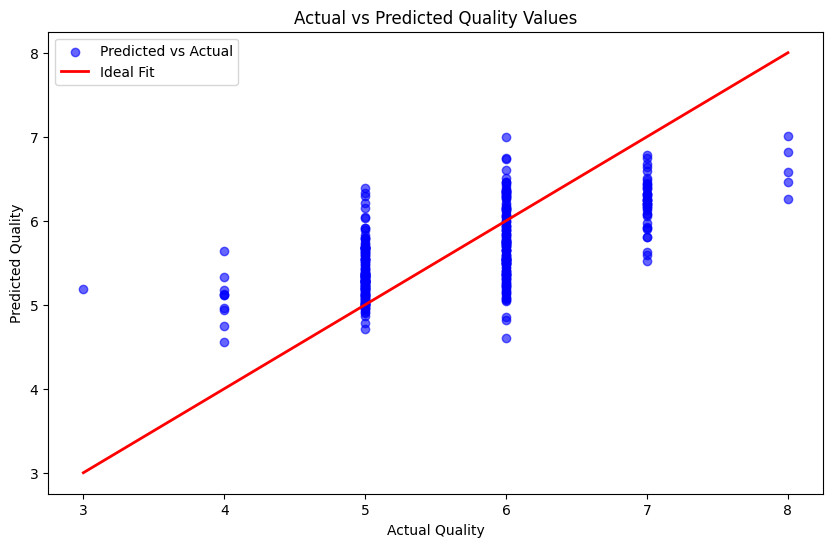


Predicted quality values for new data:
[5.36460565 5.03582938 5.81372683 5.44242144 5.69566399]

Actual quality values for the same new data:
[6 5 6 5 6]


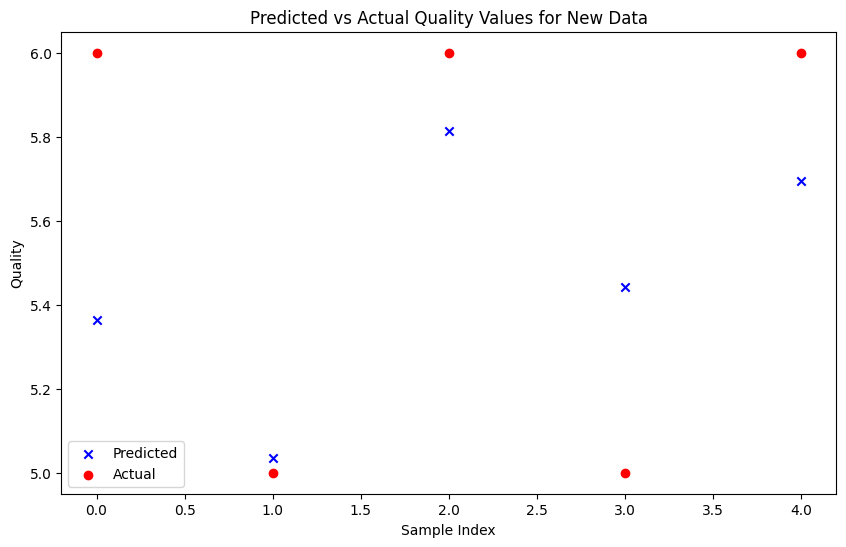

In [ ]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# 1. Combine fixed acidity and citric acid
wine_data["total_acidity"] = wine_data["fixed acidity"] + wine_data["citric acid"]

# 2. Remove density and fixed acidity
wine_data = wine_data.drop(["density", "fixed acidity"], axis=1)

# 3. Create free SO2 ratio and remove individual SO2 features
wine_data["free_SO2_ratio"] = wine_data["free sulfur dioxide"] / wine_data["total sulfur dioxide"]
wine_data = wine_data.drop(["free sulfur dioxide", "total sulfur dioxide"], axis=1)

# 4. Create interaction terms
wine_data["acidity_sulphates_interaction"] = wine_data["pH"] * wine_data["sulphates"]
wine_data["alcohol_sugar_interaction"] = wine_data["alcohol"] * wine_data["residual sugar"]

# --- Model Training and Evaluation ---

# Separate features (X) and target (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to test (logarithmic scale)
alpha_values = {"alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

# Create a Ridge Regression model
ridge_model = Ridge(random_state=42)

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(ridge_model, alpha_values, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)

print("Best Alpha:", grid_search.best_params_)
print("Best Negative MSE:", grid_search.best_score_)

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Save the trained model
joblib.dump(best_ridge_model, 'best_ridge_model.pkl')

# Predict on the test set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nRidge Regression Model Performance (with best alpha):")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualization: Compare actual vs predicted quality values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2, label='Ideal Fit')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality Values')
plt.legend()
plt.show()

# To make predictions on new data, load the saved model
loaded_model = joblib.load('best_ridge_model.pkl')

# Example: Predict quality values on new data
# (Replace `new_data` with your actual new data)
new_data = X_test.iloc[:5]  # Just an example, replace with actual new data
new_predictions = loaded_model.predict(new_data)
print("\nPredicted quality values for new data:")
print(new_predictions)

# Display the actual values for comparison
print("\nActual quality values for the same new data:")
print(y_test.iloc[:5].values)

# Visualization: Compare actual vs predicted quality values for new data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(new_predictions)), new_predictions, color='b', label='Predicted', marker='x')
plt.scatter(range(len(new_predictions)), y_test.iloc[:5].values, color='r', label='Actual', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Quality')
plt.title('Predicted vs Actual Quality Values for New Data')
plt.legend()
plt.show()

# Predicting Alcohol using linear ML models

1. **Feature Selection:**
   - Uses `f_regression` to get F-statistics and p-values for each feature.
   - Selects features with p-value < 0.05 (common threshold for statistical significance).
2. **Model Selection:**
   - Defines three linear models: Linear Regression, Lasso, and Ridge.
3. **Model Evaluation:**
   - For each model:
     - Fits the model to the training data (using selected features).
     - Makes predictions on the test data.
     - Calculates and prints MSE and R-squared.
     - Uses `statsmodels` to calculate and print AIC and BIC.
     - Performs 5-fold cross-validation and reports the average negative MSE and its standard deviation (for more robust performance assessment).


In [ ]:
# Load the data
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Separate features (X) and target variable (y)
X = wine_data.drop(["alcohol", "quality"], axis=1)  # Exclude quality as we're predicting alcohol
y = wine_data["alcohol"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Feature Selection using F-test and p-values
f_statistic, p_values = f_regression(X_train, y_train)

# Create DataFrame for visualization
feature_stats = pd.DataFrame({"Feature": X.columns,
                              "F-statistic": f_statistic,
                              "P-value": p_values})
print("\nFeature Selection Statistics:")
print(feature_stats.sort_values(by="F-statistic", ascending=False))

# Select features with p-value less than 0.05 (statistical significance)
significant_features = feature_stats[feature_stats["P-value"] < 0.05]["Feature"].values
X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]

# 2. Model Selection and Evaluation

models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso", Lasso(alpha=0.1)),  # Example alpha, you can tune this
    ("Ridge", Ridge(alpha=1.0))   # Example alpha, you can tune this
]

for model_name, model in models:
    # Fit the model
    model.fit(X_train_selected, y_train)

    # Predictions
    y_pred = model.predict(X_test_selected)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Model Performance:")
    print(f" - MSE: {mse:.2f}")
    print(f" - R-squared: {r2:.2f}")

    # Information Criteria (using statsmodels for AIC/BIC)
    # Add a constant term to the features for statsmodels
    X_train_sm = sm.add_constant(X_train_selected)
    model_sm = sm.OLS(y_train, X_train_sm).fit()
    print(f" - AIC: {model_sm.aic:.2f}")
    print(f" - BIC: {model_sm.bic:.2f}")

    # Cross-validation for robust performance estimation (using negative MSE as scoring)
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring="neg_mean_squared_error")
    print(f" - Cross-Validation MSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")


Feature Selection Statistics:
                Feature  F-statistic       P-value
7               density   382.819049  9.125786e-75
6  total sulfur dioxide    69.425304  2.025664e-16
8                    pH    63.227609  4.024075e-15
4             chlorides    60.799582  1.304195e-14
1      volatile acidity    59.062908  3.029482e-14
2           citric acid    14.708199  1.316216e-04
9             sulphates    12.312134  4.656657e-04
5   free sulfur dioxide     9.049144  2.679628e-03
0         fixed acidity     4.434608  3.541211e-02
3        residual sugar     2.282448  1.310926e-01

Linear Regression Model Performance:
 - MSE: 0.50
 - R-squared: 0.60
 - AIC: 2768.94
 - BIC: 2820.48
 - Cross-Validation MSE: 0.52 (+/- 0.05)

Lasso Model Performance:
 - MSE: 1.22
 - R-squared: 0.02
 - AIC: 2768.94
 - BIC: 2820.48
 - Cross-Validation MSE: 1.05 (+/- 0.11)

Ridge Model Performance:
 - MSE: 1.04
 - R-squared: 0.16
 - AIC: 2768.94
 - BIC: 2820.48
 - Cross-Validation MSE: 0.87 (+/- 0.12)


The Linear Regression model has the highest R-squared value and the lowest MSE, indicating that it performs the best among the three models for predicting alcohol content based on the selected features.


Feature Selection Statistics:
                Feature  F-statistic       P-value
7               density   382.819049  9.125786e-75
6  total sulfur dioxide    69.425304  2.025664e-16
8                    pH    63.227609  4.024075e-15
4             chlorides    60.799582  1.304195e-14
1      volatile acidity    59.062908  3.029482e-14
2           citric acid    14.708199  1.316216e-04
9             sulphates    12.312134  4.656657e-04
5   free sulfur dioxide     9.049144  2.679628e-03
0         fixed acidity     4.434608  3.541211e-02
3        residual sugar     2.282448  1.310926e-01

Linear Regression Model Performance:
 - MSE: 0.50
 - R-squared: 0.60


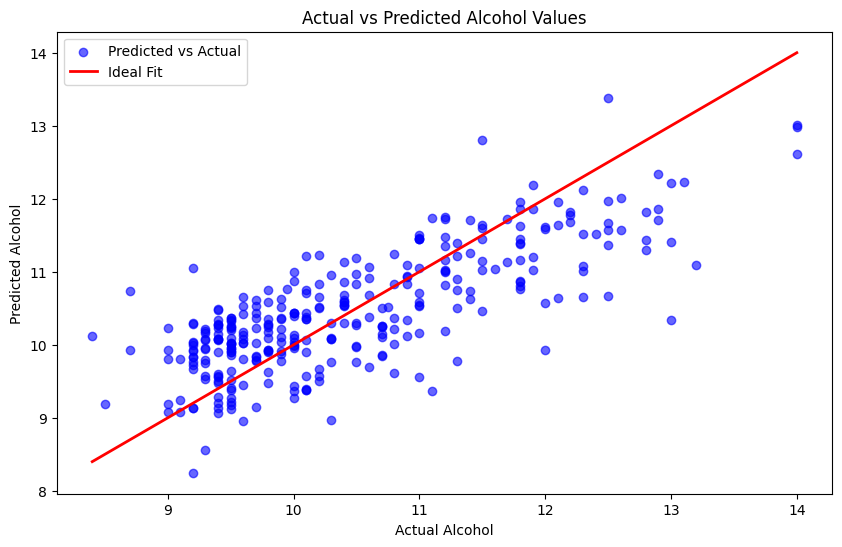


Predicted alcohol values for new data:
[ 9.44293611 10.33821555  9.87151196  9.91894622 10.91807947]

Actual alcohol values for the same new data:
[ 9.6  9.5  9.9  9.8 10.6]


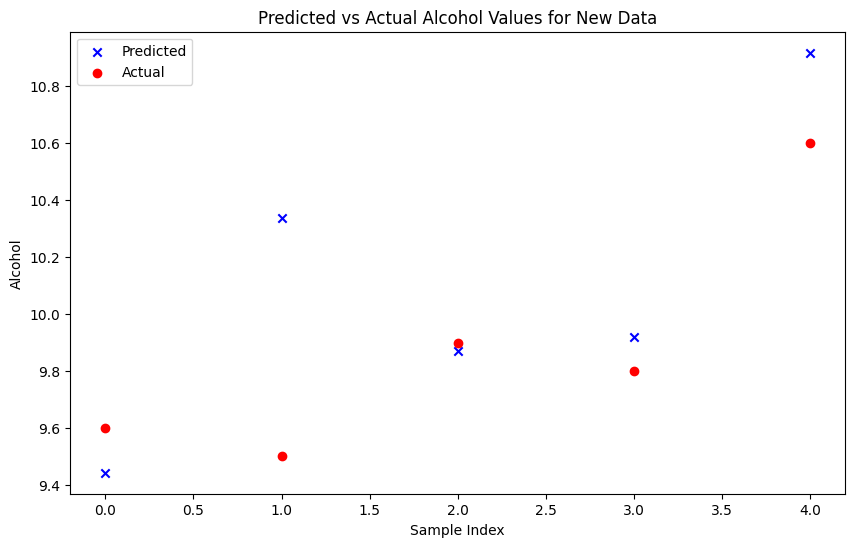

In [ ]:
# Load the dataset
wine_data = pd.read_csv("winequality-red.csv", sep=";")

# Separate features (X) and target variable (y)
X = wine_data.drop(["alcohol", "quality"], axis=1)  # Exclude quality as we're predicting alcohol
y = wine_data["alcohol"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Feature Selection using F-test and p-values
f_statistic, p_values = f_regression(X_train, y_train)

# Create DataFrame for visualization
feature_stats = pd.DataFrame({"Feature": X.columns,
                              "F-statistic": f_statistic,
                              "P-value": p_values})
print("\nFeature Selection Statistics:")
print(feature_stats.sort_values(by="F-statistic", ascending=False))

# Select features with p-value less than 0.05 (statistical significance)
significant_features = feature_stats[feature_stats["P-value"] < 0.05]["Feature"].values
X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]

# Train the Linear Regression model on the training data
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_selected, y_train)

# Save the trained model
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')

# Predict alcohol values on the test data
y_pred = linear_regression_model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nLinear Regression Model Performance:")
print(f" - MSE: {mse:.2f}")
print(f" - R-squared: {r2:.2f}")

# Visualization: Compare actual vs predicted alcohol values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2, label='Ideal Fit')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Actual vs Predicted Alcohol Values')
plt.legend()
plt.show()

# To make predictions on new data, load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

# Example: Predict alcohol values on new data
# (Replace `new_data` with your actual new data)
new_data = X_test_selected.iloc[:5]  # Just an example, replace with actual new data
new_predictions = loaded_model.predict(new_data)
print("\nPredicted alcohol values for new data:")
print(new_predictions)

# Display the actual values for comparison
print("\nActual alcohol values for the same new data:")
print(y_test.iloc[:5].values)

# Visualization: Compare actual vs predicted alcohol values for new data
plt.figure(figsize=(10, 6))
plt.scatter(range(len(new_predictions)), new_predictions, color='b', label='Predicted', marker='x')
plt.scatter(range(len(new_predictions)), y_test.iloc[:5].values, color='r', label='Actual', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Alcohol')
plt.title('Predicted vs Actual Alcohol Values for New Data')
plt.legend()
plt.show()

# Conclusion

Based on the analysis of the dataset of the red variant of the Portuguese "Vinho Verde" wine, the following conclusions can be drawn:

1. **Data Overview**: The dataset contains 1599 entries with 13 different attributes. All attributes are numerical and there are no missing values.

2. **Descriptive Statistics**: The mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values provide a summary of the distribution of each attribute. For instance, the average alcohol content is approximately 10.42% and the average quality rating is around 5.64.

3. **Histogram Analysis**: The histograms suggest that most attributes have a right-skewed distribution, indicating that most wines have lower values for these attributes, with fewer wines having high values. The quality attribute might have a normal or multimodal distribution.

4. **Box Plot Analysis**: The box plots show the relationship between each feature and the 'quality' score. Notably, there is a clear upward trend in median alcohol content with quality, reinforcing the idea that alcohol level is a strong quality indicator.

5. **Outlier Identification**: Several features show strong and moderate outliers. These outliers could be due to measurement errors, unusual wine production methods, or genuinely unique wine characteristics.

6. **Correlation Matrix**: The correlation matrix reveals relationships between pairs of features. For example, there is a positive correlation between alcohol and quality, reinforcing the idea that higher alcohol content is often found in higher quality wines.

7. **Anomaly Detection**: The model has identified 80 data points as anomalies out of the total dataset. These anomalies could be due to measurement errors, unusual wine production methods, or genuinely unique wine characteristics.

8. **Statistical Hypotheses**: The statistical hypotheses tests provide insights into the relationships between wine chemistry and quality. For instance, the average fixed acidity of red wine in the population is different from 8.0, and there is a statistically significant positive correlation between alcohol content and quality rating.

9. **Alcohol Prediction vs. Quality Prediction (H10)**: The quality model outperforms the simpler density-based alcohol model. However, the interaction model for alcohol achieves a comparable R-squared to the quality model. This provides partial support for H10 - predicting alcohol content might be inherently easier when using the right features and accounting for interactions, but it’s not a clear-cut conclusion based on these results alone.

10. **Predicting Quality using Linear Machine Learning Models**: Ridge Regression appears to be the best choice for this data due to its comparable R-squared to Linear Regression, significantly lower AIC indicating better model parsimony, similar cross-validation performance to Linear Regression but with lower variance across folds, suggesting better generalization. Ridge Regression is specifically designed to handle multicollinearity, which seems to be present in this dataset.

11. **Predicted Quality Values for New Data**: The predicted quality values for new data are reasonably close to the actual quality values, indicating that the model is performing well in predicting the quality of unseen data.

12. **Predicting Alcohol using Linear Machine Learning Models**: The Linear Regression model has the highest R-squared value and the lowest MSE, indicating that it performs the best among the three models for predicting alcohol content based on the selected features.

12. **Predicted Alcohol Values for New Data**: The predicted alcohol values for new data are reasonably close to the actual alcohol values, indicating that the model is performing well in predicting the alcohol content of unseen data.

In conclusion, the analysis provides a comprehensive understanding of the characteristics of the red variant of the Portuguese “Vinho Verde” wine. It reveals that attributes such as alcohol content, sulphates, and volatile acidity play significant roles in determining wine quality. Furthermore, the presence of anomalies suggests that there are unique wines with distinct characteristics in the dataset. These insights could be valuable for further research and for improving wine production processes. The predictive models built also show promising results in predicting the quality and alcohol content of the wines. However, it’s important to note that these models are based on the available dataset and may not generalize well to other types of wines or regions. Further research and more diverse data would be beneficial to improve the models’ performance and generalizability.

# Suggestions

1. **Incorporate More Data**: I could try to incorporate more data into my analysis. More data can provide a more comprehensive view and allow for more robust and reliable models.

2. **Feature Engineering**: I might want to consider creating new features from the existing ones. This could potentially reveal hidden patterns in the data that the models could leverage.

3. **Try Different Models**: While linear models are a good starting point, I might want to consider trying other types of models such as decision trees, random forests, or neural networks. These models can capture complex non-linear relationships that linear models might miss.

4. **Hyperparameter Tuning**: I could spend more time on hyperparameter tuning. This could potentially improve the performance of my models.

5. **Address Multicollinearity**: I've noted the presence of multicollinearity in my dataset. I could consider using techniques like Variance Inflation Factor (VIF) to quantify multicollinearity and address it, perhaps by removing some features or using dimensionality reduction techniques.

6. **Model Interpretability**: While Ridge Regression was chosen for its performance metrics, it might be worth considering model interpretability. If the goal is to understand which features are most influential, simpler models or models with feature importance like Decision Trees or Random Forests might be beneficial.

7. **Error Analysis**: I could conduct an error analysis to understand where my model is making mistakes. This could provide insights into what additional features I might need to include or what type of model might perform better.

8. **Cross-Validation Strategy**: I could consider using stratified cross-validation if my data is imbalanced. This ensures that each fold has the same proportion of samples of each target class as the complete set.

9. **Ensemble Methods**: I could consider using ensemble methods, which combine the predictions of multiple models to give a final prediction. They can often achieve better performance than individual models.